In [14]:
# 코스피 이평을 이용하여 포트폴리오 믹싱
# 필요한 패키지 호출

import numpy as np
import pandas as pd
import pandas_datareader as wb

import datetime

In [15]:
# 포트폴리오 불러오기

portfolio_1 = pd.read_csv('Test_CSV/913695/trade_history_daily_913695.csv')
portfolio_2 = pd.read_csv('Test_CSV/966955/trade_history_daily_966955.csv')

In [16]:
# 요일 산출후 요일별 수익률 모아서 확인하기

merge_df = pd.DataFrame()

merge_df['날짜'] = portfolio_1['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
merge_df['요일'] = merge_df['날짜'].apply(lambda x: pd.Timestamp(x).dayofweek)
merge_df['수익률_913695'] = portfolio_1['일일수익률']
merge_df['수익률_966955'] = portfolio_2['일일수익률']

print(merge_df)

            날짜  요일  수익률_913695  수익률_966955
0   2017-01-02   0        1.85        1.67
1   2017-01-03   1        0.22        0.94
2   2017-01-04   2        0.29       -0.56
3   2017-01-05   3        1.95        0.86
4   2017-01-06   4        0.08        0.39
..         ...  ..         ...         ...
765 2020-02-19   2       -1.64        0.74
766 2020-02-20   3       -0.01       -1.04
767 2020-02-21   4       -1.70        0.57
768 2020-02-24   0       -0.89       -0.32
769 2020-02-25   1       -0.13        0.11

[770 rows x 4 columns]


                 High      Low       Open      Close    Volume  Adj Close
Date                                                                     
2017-01-03  2044.0699  2028.47  2034.3101  2043.9700  268100.0  2043.9700
2017-01-04  2046.2900  2040.61  2046.2900  2045.6400  371500.0  2045.6400
2017-01-05  2046.5000  2039.49  2045.5200  2041.9500  541300.0  2041.9500
2017-01-06  2051.8401  2045.66  2048.1101  2049.1201  455400.0  2049.1201
2017-01-09  2053.1799  2046.47  2053.1799  2048.7800  398300.0  2048.7800
...               ...      ...        ...        ...       ...        ...
2020-02-17  2250.0500  2230.26  2243.0701  2242.1699  458200.0  2242.1699
2020-02-18  2232.9299  2205.21  2225.9800  2208.8799  470400.0  2208.8799
2020-02-19  2226.0000  2191.20  2222.5100  2210.3401  590800.0  2210.3401
2020-02-20  2228.1799  2186.72  2223.5500  2195.5000  709600.0  2195.5000
2020-02-21  2184.4299  2160.28  2165.6499  2162.8401  635500.0  2162.8401

[759 rows x 6 columns]
Close Median 2

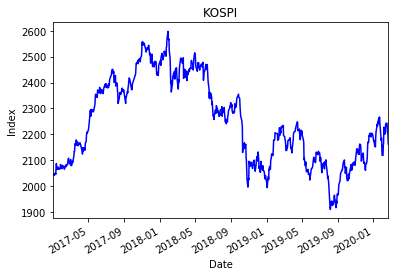

In [17]:
## KOSPI 지수 호출
pd.set_option('precision', 4)
 
start = datetime.datetime(2017, 1, 2)
end = datetime.datetime(2020, 2, 21)
df_null = wb.DataReader("^KS11","yahoo",  start, end)
df = df_null.dropna()
 
kospi_chart = df.Close.plot(style='b')
kospi_chart.set_title("KOSPI")
kospi_chart.set_ylabel("Index")
kospi_chart.set_xlim(str(start), str(end))
 
print(df)
 
print("Close Median", df['Close'].median())
print(df['Close'].describe())
print(df.corr())

In [39]:
## 코스피 지수, 포트폴리오 일별수익률 추가

temp = pd.DataFrame()
temp['KOSPI'] = df['Close']
new_idx_list = list(range(0, len(temp.index)))
temp.index = new_idx_list

temp['수익률_913695'] = portfolio_1['일일수익률']
temp['수익률_966955'] = portfolio_2['일일수익률']

print(temp)

         KOSPI  수익률_913695  수익률_966955
0    2043.9700        1.85        1.67
1    2045.6400        0.22        0.94
2    2041.9500        0.29       -0.56
3    2049.1201        1.95        0.86
4    2048.7800        0.08        0.39
..         ...         ...         ...
754  2242.1699        0.00        0.00
755  2208.8799        2.68        1.43
756  2210.3401        0.81        1.30
757  2195.5000       -3.16       -0.86
758  2162.8401        0.19        0.26

[759 rows x 3 columns]


In [40]:
## 상관성 계수 확인

print(temp.corr())

             KOSPI  수익률_913695  수익률_966955
KOSPI       1.0000      0.0162      0.0048
수익률_913695  0.0162      1.0000      0.3594
수익률_966955  0.0048      0.3594      1.0000


In [117]:
## Moving Average Data 추가
## 미래참조 오류의 해결을 위해 1칸 시프트 하여
## 어제값을 기준으로 수익률을 처리할 수 있게함.(오늘칸을 오늘값으로 비교하는게 아닌, 전날값(1칸 시프트 되었으므로)으로 비교)

temp['KP_MA_3'] = temp['KOSPI'].rolling(window=3).mean().shift(1)
temp['KP_MA_5'] = temp['KOSPI'].rolling(window=5).mean().shift(1)
temp['KP_MA_10'] = temp['KOSPI'].rolling(window=10).mean().shift(1)
temp['KP_MA_20'] = temp['KOSPI'].rolling(window=20).mean().shift(1)

## 없는 데이터는 1로 처리
temp = temp.fillna(1)

print(temp)

         KOSPI  수익률_913695  수익률_966955   KP_MA_20    KP_MA_5  KP_MA_10  \
0    2043.9700        1.85        1.67     1.0000     1.0000     1.000   
1    2045.6400        0.22        0.94     1.0000     1.0000     1.000   
2    2041.9500        0.29       -0.56     1.0000     1.0000     1.000   
3    2049.1201        1.95        0.86     1.0000     1.0000     1.000   
4    2048.7800        0.08        0.39     1.0000     1.0000     1.000   
..         ...         ...         ...        ...        ...       ...   
754  2242.1699        0.00        0.00  2208.2380  2227.8240  2202.142   
755  2208.8799        2.68        1.43  2207.9440  2236.0440  2214.471   
756  2210.3401        0.81        1.30  2205.8595  2233.1959  2219.569   
757  2195.5000       -3.16       -0.86  2203.2445  2227.5880  2224.040   
758  2162.8401        0.19        0.26  2201.0350  2220.0960  2220.796   

       KP_MA_3  Mix_MT_3   Bool  ToT_Mix_MT_3_10  ToT_913695  ToT_966955  \
0       1.0000    0.0185   True    

In [118]:
## 단기이평이 장기이평 이상일 경우 913695, 미만일 경우 966955 투자
temp['Mix_MT_3_5'] = temp['수익률_913695'].where(temp['KP_MA_3'] - temp['KP_MA_5'] >= 0, temp['수익률_966955'])/100
temp['Mix_MT_3_10'] = temp['수익률_913695'].where(temp['KP_MA_5'] - temp['KP_MA_10'] >= 0, temp['수익률_966955'])/100
temp['Mix_MT_5_20'] = temp['수익률_913695'].where(temp['KP_MA_5'] - temp['KP_MA_20'] >= 0, temp['수익률_966955'])/100

## 누적수익률 데이터 추가
temp['ToT_913695'] = np.round(np.cumprod(1 + (temp['수익률_913695']/100).values) - 1 , 4) * 100
temp['ToT_966955'] = np.round(np.cumprod(1 + (temp['수익률_966955']/100).values) - 1 , 4) * 100
temp['ToT_Mix_MT_3_5'] = np.round(np.cumprod(1 + temp['Mix_MT_3_5'].values) - 1 , 4) * 100
temp['ToT_Mix_MT_3_10'] = np.round(np.cumprod(1 + temp['Mix_MT_3_10'].values) - 1 , 4) * 100
temp['ToT_Mix_MT_5_20'] = np.round(np.cumprod(1 + temp['Mix_MT_5_20'].values) - 1 , 4) * 100

## 결과 확인
print(temp)

         KOSPI  수익률_913695  수익률_966955   KP_MA_20    KP_MA_5  KP_MA_10  \
0    2043.9700        1.85        1.67     1.0000     1.0000     1.000   
1    2045.6400        0.22        0.94     1.0000     1.0000     1.000   
2    2041.9500        0.29       -0.56     1.0000     1.0000     1.000   
3    2049.1201        1.95        0.86     1.0000     1.0000     1.000   
4    2048.7800        0.08        0.39     1.0000     1.0000     1.000   
..         ...         ...         ...        ...        ...       ...   
754  2242.1699        0.00        0.00  2208.2380  2227.8240  2202.142   
755  2208.8799        2.68        1.43  2207.9440  2236.0440  2214.471   
756  2210.3401        0.81        1.30  2205.8595  2233.1959  2219.569   
757  2195.5000       -3.16       -0.86  2203.2445  2227.5880  2224.040   
758  2162.8401        0.19        0.26  2201.0350  2220.0960  2220.796   

       KP_MA_3  Mix_MT_3   Bool  ToT_Mix_MT_3_10  ToT_913695  ToT_966955  \
0       1.0000    0.0185   True    

In [119]:
## 성과지표 만들기
def get_result(profit_data):

    ## 성과지표 출력용 데이터프레임 생성
    result_data = pd.DataFrame()
    
    for col in list(profit_data.columns):
        
        ## 성과지표 제작용 데이터 호출
        total_profit_data = profit_data[col]

        ## CAGR 계산
        start = 1
        end = total_profit_data.iloc[-1]/100 + 1

        year = int(len(total_profit_data.index)/250)
        cagr = round(((end / start) ** (1/year)-1) * 100, 2)

        ## MDD 계산
        arr_v = np.array(total_profit_data)
        peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
        peak_upper = np.argmax(arr_v[:peak_lower])
        mdd = round((arr_v[peak_lower] - arr_v[peak_upper]) / arr_v[peak_upper] * 100, 3)

        ## 데이터 추가
        result_data = result_data.append({'MT_DoW' : col,'CAGR': cagr, 'MDD': mdd} , ignore_index=True)    

    return result_data


print(get_result(temp[['ToT_913695', 'ToT_966955', 'ToT_Mix_MT_3_5', 'ToT_Mix_MT_3_10', 'ToT_Mix_MT_5_20']]))

     CAGR     MDD           MT_DoW
0  113.84 -14.259       ToT_913695
1   75.86 -10.333       ToT_966955
2  108.98 -10.285   ToT_Mix_MT_3_5
3  103.49 -11.522  ToT_Mix_MT_3_10
4  104.44  -8.587  ToT_Mix_MT_5_20


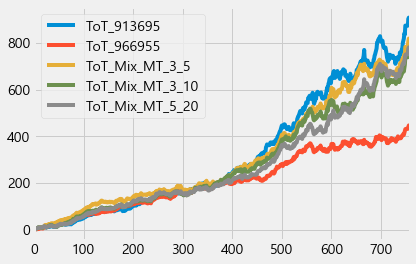

In [120]:
# 그래프로 시각화하여 확인
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.style.use('fivethirtyeight')

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

temp[['ToT_913695', 'ToT_966955', 'ToT_Mix_MT_3_5', 'ToT_Mix_MT_3_10', 'ToT_Mix_MT_5_20']].plot(figsize=(6,4))

## 결과 : 중단기 이평을 조합하여 포트폴리오 믹싱을 하니 결과값이 좋아짐. CAGR가 매우 개선되는것을 볼수있음.
## 다만, 없는 데이터를 0 처리한게 조금 정확성을 낮추는 요인이 됐을것으로 추측함.